## Step of Machine Learning 

## importing the essential Libraries & Metrics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the Data

In [2]:
df = pd.read_csv("train.csv")

test_data = pd.read_csv("test.csv")

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Exploratory Data Analysis

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


#### Visualizing the Correlation between the numerical variables

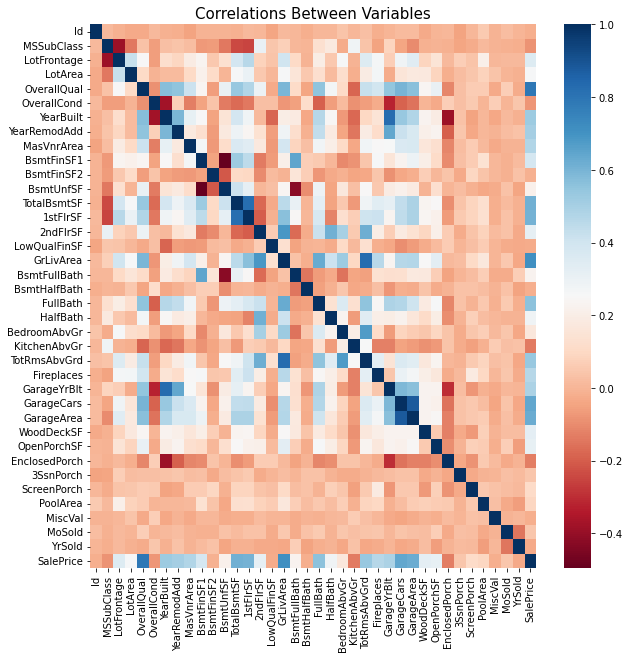

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='RdBu')
plt.title("Correlations Between Variables",size=15)
plt.show()

## Feature Selection

** We are selecting numerical features which have more than 0.50 or less than -0.50 correlation rate based on Pearson Correlation Method—which is the default value of parameter "method" in corr() function. As for selecting categorical features, I selected the categorical values which I believe have significant effect on the target variable such as Heating and MSZoning **

In [80]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | 
                                                 (df.corr()["SalePrice"]<-0.50)].index)

In [81]:
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols

df = df[important_cols]


In [82]:
df

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,7,2003,2003,856,856,1710,2,8,2,548,208500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
2,7,2001,2002,920,920,1786,2,6,2,608,223500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
3,7,1915,1970,756,961,1717,1,7,3,642,140000,RL,AllPub,1Fam,GasA,Gd,Abnorml,Gtl
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl


# Checking for Missing Value

In [86]:
print('Missing Value by Columns')
print('-'*30)
print(df.isna().sum())

Missing Value by Columns
------------------------------
OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
SalePrice        0
MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64


## Data Visualization 

Visualizing teh Correlation between the numerical variables using pairplot visualization

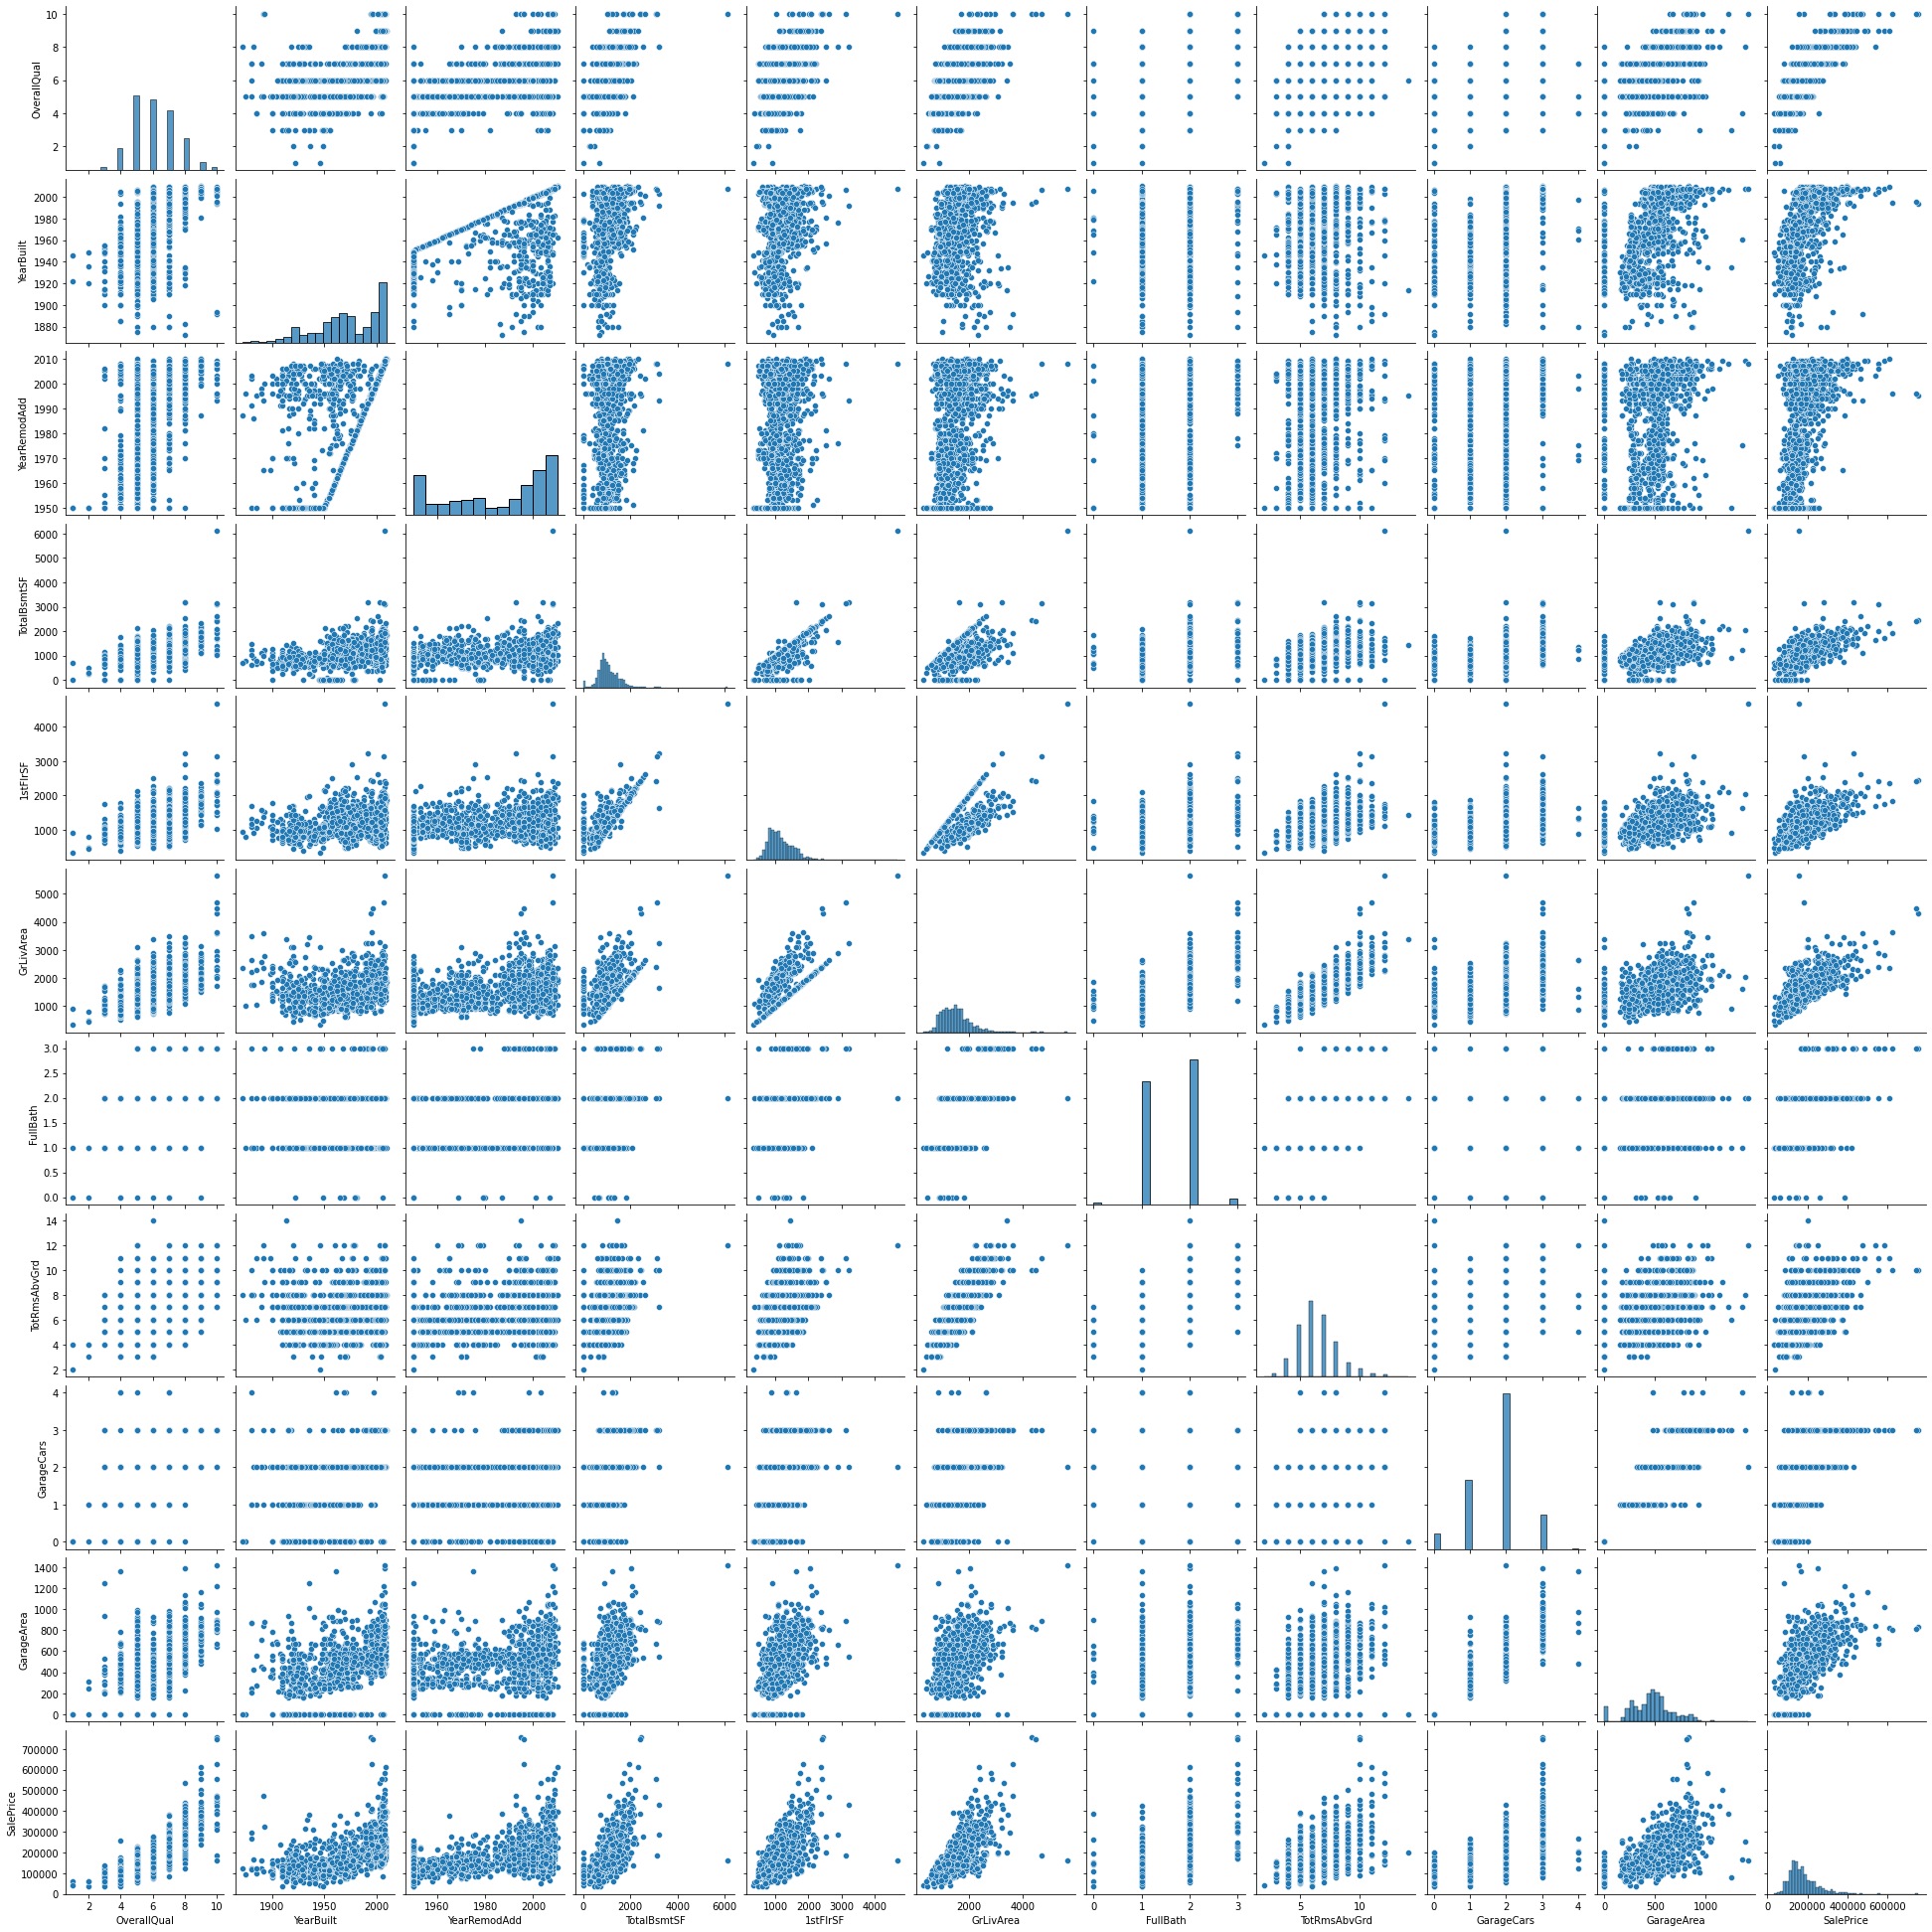

In [89]:
sns.pairplot(df[])

**Spliting the Data into X and Y Chunks for Model Training and Test.

In [90]:
X = df.drop("SalePrice",axis=1)
Y = df['SalePrice']

**One-Hot-Encoding
 ** Encoding the categorical features in X dataset by using One-Hot-Encoding Method

In [95]:
from sklearn.preprocessing import OneHotEncoder

In [96]:
X = pd.get_dummies(X,columns=cat_cols)

In [97]:
X

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,7,2003,2003,856,856,1710,2,8,2,548,...,0,0,0,0,0,1,0,1,0,0
1,6,1976,1976,1262,1262,1262,2,6,2,460,...,1,0,0,0,0,1,0,1,0,0
2,7,2001,2002,920,920,1786,2,6,2,608,...,0,0,0,0,0,1,0,1,0,0
3,7,1915,1970,756,961,1717,1,7,3,642,...,0,1,0,0,0,0,0,1,0,0
4,8,2000,2000,1145,1145,2198,2,9,3,836,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,...,1,0,0,0,0,1,0,1,0,0
1456,6,1978,1988,1542,2073,2073,2,7,2,500,...,1,0,0,0,0,1,0,1,0,0
1457,7,1941,2006,1152,1188,2340,2,9,1,252,...,0,0,0,0,0,1,0,1,0,0
1458,5,1950,1996,1078,1078,1078,1,5,1,240,...,0,0,0,0,0,1,0,1,0,0


In [98]:
cat_cols

['MSZoning',
 'Utilities',
 'BldgType',
 'Heating',
 'KitchenQual',
 'SaleCondition',
 'LandSlope']

In [102]:
from sklearn.preprocessing import StandardScaler

In [100]:
important_num_cols.remove('SalePrice')

In [101]:
important_num_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

In [103]:
scaler = StandardScaler()

In [107]:
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [108]:
X

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000,...,0,0,0,0,0,1,0,1,0,0
1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731,...,1,0,0,0,0,1,0,1,0,0
2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726,...,0,0,0,0,0,1,0,1,0,0
3,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,0.790804,...,0,1,0,0,0,0,0,1,0,0
4,1.374795,0.951632,0.733308,0.199680,-0.045611,1.299326,0.789741,1.527656,1.650307,1.698485,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.918511,0.733308,-0.238122,-0.542435,0.250402,0.789741,0.296763,0.311725,-0.060731,...,1,0,0,0,0,1,0,1,0,0
1456,-0.071836,0.222975,0.151865,1.104925,2.355701,1.061367,0.789741,0.296763,0.311725,0.126420,...,1,0,0,0,0,1,0,1,0,0
1457,0.651479,-1.002492,1.024029,0.215641,0.065656,1.569647,0.789741,1.527656,-1.026858,-1.033914,...,0,0,0,0,0,1,0,1,0,0
1458,-0.795151,-0.704406,0.539493,0.046905,-0.218982,-0.832788,-1.026041,-0.934130,-1.026858,-1.090059,...,0,0,0,0,0,1,0,1,0,0


** as you can see, standardization is done successfully

In [110]:
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000,...,0,0,0,0,0,1,0,1,0,0
1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731,...,1,0,0,0,0,1,0,1,0,0
2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726,...,0,0,0,0,0,1,0,1,0,0
3,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,0.790804,...,0,1,0,0,0,0,0,1,0,0
4,1.374795,0.951632,0.733308,0.199680,-0.045611,1.299326,0.789741,1.527656,1.650307,1.698485,...,0,0,0,0,0,1,0,1,0,0


In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

Defining several  evaluation functions for convenience

In [113]:
from sklearn.linear_model import LinearRegression 

In [114]:
lr = LinearRegression()

In [118]:
lr.fit(X_train,Y_train,)

LinearRegression()

In [117]:
lr.score(X,Y)

0.8114898988150592

In [123]:
predictions = lr.predict(X_test)

In [122]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [124]:
mean_absolute_error(predictions,Y_test)

23567.890565943395

In [125]:
mean_squared_error(predictions,Y_test)

1414931404.6297855

In [126]:
from sklearn.model_selection import cross_val_score

In [147]:
np.mean(cross_val_score(lr,X_train,Y_train,cv=5,scoring='neg_mean_squared_error'))

-5.3224491259597716e+26

In [150]:
def evaluation(y,predication):
    mae = mean_absolute_error(y,predication)
    mse = mean_squared_error(y,predication)
    rmse = np.sqrt(mean_squared_error(y,predication))
    return mae,mse,rmse

In [177]:
mae,mse,rmse = evaluation(y=Y_test,predication=predictions)
models_camparsion = pd.DataFrame(columns=["Model","MAE","MSE","RMSE"])#,"R2 Score","RMSE (Cross-Validation)"])
models_camparsion = models_camparsion.append({'Model':
                          "Linear Regression","MAE":mae,'MSE':mse,'RMSE':rmse},ignore_index=True)

In [178]:
models_camparsion

,Model,MAE,MSE,RMSE
0,Linear Regression,23567.890566,1414931404.629786,37615.573964


In [ ]:
models_camparsion.append({'Model':
                          "Linear Regression","MAE":mae,'MSE':mse,'RMSE':rmse},ignore_index=True)

In [160]:
from sklearn.linear_model import Ridge

In [161]:
ridge_model = Ridge(max_iter=100)

In [162]:
ridge_model.fit(X_train,Y_train)

Ridge(max_iter=100)

In [166]:
ridge_pre = ridge_model.predict(X_test)

In [167]:
mean_squared_error(Y_test,ridge_pre)

1404264216.859559

In [179]:
mae,mse,rmse = evaluation(y=Y_test,predication=ridge_pre)
#models_camparsion = pd.DataFrame(columns=["Model","MAE","MSE","RMSE"])#,"R2 Score","RMSE (Cross-Validation)"])
models_camparsion = models_camparsion.append({'Model':
                          "Ridge Regression","MAE":mae,'MSE':mse,'RMSE':rmse},ignore_index=True)

In [180]:
models_camparsion

,Model,MAE,MSE,RMSE
0,Linear Regression,23567.890566,1414931404.629786,37615.573964
1,Ridge Regression,23435.503712,1404264216.859559,37473.513538


In [181]:
from sklearn.linear_model import ElasticNet

In [182]:
elasticNet = ElasticNet()

In [184]:
elasticNet.fit(X_train,Y_train)
elasticNet_pre = elasticNet.predict(X_test)
mae,mse,rmse = evaluation(y=Y_test,predication=elasticNet_pre)
#models_camparsion = pd.DataFrame(columns=["Model","MAE","MSE","RMSE"])#,"R2 Score","RMSE (Cross-Validation)"])
models_camparsion = models_camparsion.append({'Model':
                          "ElasticNet Regression","MAE":mae,'MSE':mse,'RMSE':rmse},ignore_index=True)

In [185]:
models_camparsion

,Model,MAE,MSE,RMSE
0,Linear Regression,23567.890566,1414931404.629786,37615.573964
1,Ridge Regression,23435.503712,1404264216.859559,37473.513538
2,ElasticNet Regression,23792.743785,1718445790.137139,41454.140808
